<a href="https://colab.research.google.com/github/ndoshi83/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/NDoshi_DS4_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
# Import Pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Initial review of dataset

# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [3]:
# Create variable for column names
col_names = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

# Import dataset into dataframe
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=col_names)

# Verify data loaded correctly
print(df.shape)
print(df.head())
print(df.dtypes)


(306, 4)
   patient_age  operation_year  positive_axillary_nodes  survival_status
0           30              64                        1                1
1           30              62                        3                1
2           30              65                        0                1
3           31              59                        2                1
4           31              65                        4                1
patient_age                int64
operation_year             int64
positive_axillary_nodes    int64
survival_status            int64
dtype: object


In [4]:
# Show the current values in survival status
df.survival_status.unique()
# Update survival_status attribute to show 0 for not survived instead of 2
df.replace({'survival_status': 2}, 0, inplace=True)

# Showing 10 rows to show survivial status has been updated from (1,2) to (1,0)
df.head(10)

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
# TODO
# Look at the initial summary info for the dataset
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# Use seaborn to take a initial look at the plots
import seaborn as sns

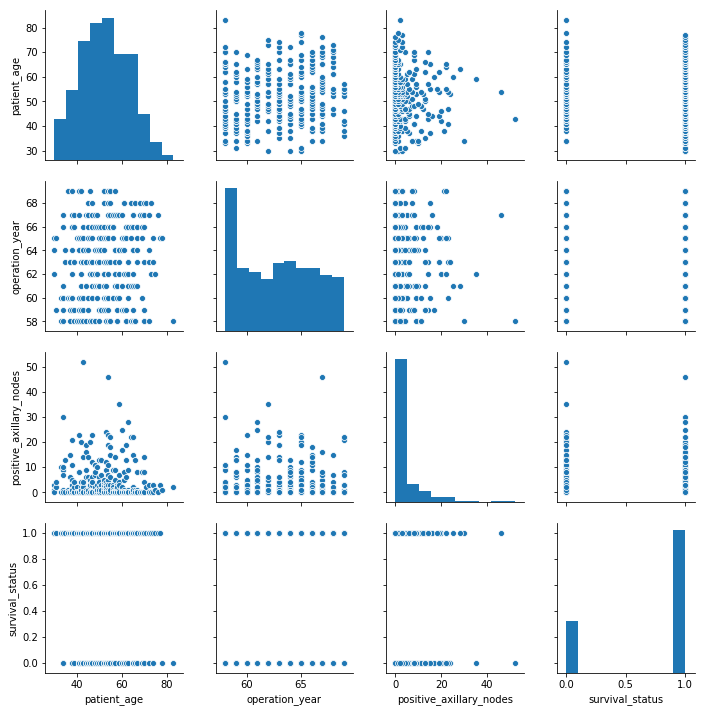

In [7]:
# Create pairplot for initial look
sns.pairplot(df)

In [8]:
# Create a crosstab table to analyze age and survival status
pd.crosstab(df['survival_status'],df['patient_age'])

patient_age,30,31,33,34,35,36,37,38,39,40,...,70,71,72,73,74,75,76,77,78,83
survival_status,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,1,1,0,...,2,0,1,0,1,0,0,0,1,1
1,3,2,2,5,2,2,6,9,5,3,...,5,1,3,2,1,1,1,1,0,0


In [9]:
# Going to bin age to get a cleaner look
age_bins = pd.cut(df['patient_age'], 3).astype('<U32') #Initially trying 5 bins

pd.crosstab(df['survival_status'], age_bins, normalize='columns')

patient_age,"(29.947, 47.667]","(47.667, 65.333]","(65.333, 83.0]"
survival_status,,,
0,0.242991,0.273292,0.289474
1,0.757009,0.726708,0.710526


In [10]:
# The above seems counter-intuitive as the survival rate is increasing with age
# We will now look at survival rate and operation year to see if improved technologies increased the survival rate
operation_year_bins = pd.cut(df['operation_year'], 3).astype('<U32')
pd.crosstab(df['survival_status'], operation_year_bins, normalize='columns')

operation_year,"(57.989, 61.667]","(61.667, 65.333]","(65.333, 69.0]"
survival_status,,,
0,0.239316,0.321429,0.220779
1,0.760684,0.678571,0.779221


In [11]:
# Now we will look at positive axillary nodes and survival status
node_bins = pd.cut(df['positive_axillary_nodes'], 3).astype('<U32')
pd.crosstab(df['survival_status'], node_bins, normalize='columns')

positive_axillary_nodes,"(-0.052, 17.333]","(17.333, 34.667]","(34.667, 52.0]"
survival_status,,,
0,0.244755,0.529412,0.666667
1,0.755245,0.470588,0.333333


In [12]:
# Now we will combine positive axillary nodes and age to see impact on survival status
ct = pd.crosstab(age_bins,[node_bins,df['survival_status']],normalize='columns')
ct

positive_axillary_nodes (-0.052, 17.333]           (17.333, 34.667]        \
survival_status                        0         1                0     1   
patient_age                                                                 
(29.947, 47.667]                0.285714  0.365741         0.555556  0.25   
(47.667, 65.333]                0.557143  0.509259         0.444444  0.75   
(65.333, 83.0]                  0.157143  0.125000         0.000000  0.00   

positive_axillary_nodes (34.667, 52.0]       
survival_status                      0    1  
patient_age                                  
(29.947, 47.667]                   0.5  0.0  
(47.667, 65.333]                   0.5  1.0  
(65.333, 83.0]                     0.0  0.0

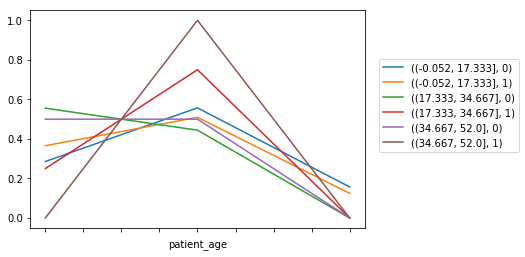

In [13]:
# Plot the above crosstab
ct.plot()
plt.legend(loc='upper center', bbox_to_anchor=(1.25,0.8), ncol=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


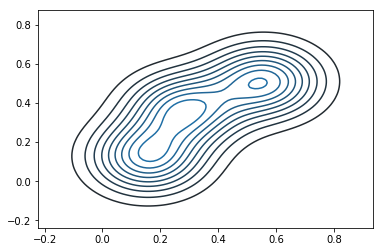

In [14]:
# Use seaborn to plot density for the above crosstab
sns.kdeplot(ct)

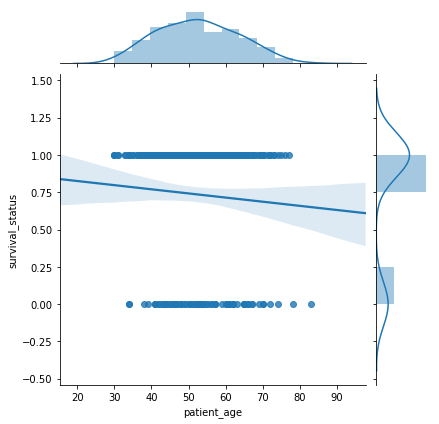

In [15]:
# Another plot to see trends
sns.jointplot('patient_age', 'survival_status', data=df, kind='reg')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
  The age feature clearly shows that the younger you are, the better chance you have at survival. 
- What is at least one feature that looks to have a negative relationship with survival?
  The positive axillary nodes have a clear negative impact to survival which is that as there are more positive nodes, chances of survival go down dramatically.
- How are those two features related with each other, and what might that mean?
  Next I combined the 2 features above to see impact on the survival and that having a young age and low positive axillary node count offered the best chance for survival. As age grows and nodes increased which in turn lowered the chance for survival.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.